<a href="https://colab.research.google.com/github/MaschinenNah/MachineLearningKursCdV/blob/main/04_01_MNIST_Dense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handgeschriebene Ziffern erkennen**


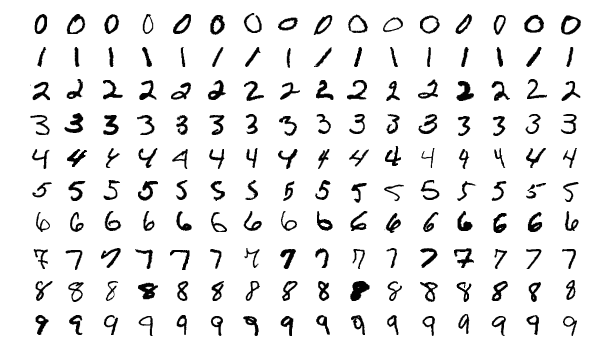

Handgeschriebene Buchstaben aus dem MNIST-Datensatz [(Quelle)](https://commons.wikimedia.org/wiki/File:MnistExamples.png)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

####**Trainings und Testdaten laden und formatieren**


`keras` bringt von sich aus einige "klassische" Datensätze zum Experimentieren und Lernen mit. Wir verwenden in diesem Beispiel den [MNIST-Datensatz](https://de.wikipedia.org/wiki/MNIST_Datenbank). Er enthält 70.000 Bilder handgeschriebener Ziffern von 0-9 im Format 28x28. Zu jedem dieser Bilder wird die Information mitgeliefert, um welche Ziffer es sich handelt.

Ganz allgemein gilt für die Datensätze im überwachten Lernen:

**x = Eingabe (in diesem Fall: Das Bild eines Buchstabens)**

**y = korrekte Ausgabe (in diesem Fall: eine Zahl von 0-9)**

Eine weitere wichtige Unterscheidung, die wir beim maschinellen Lernen immer treffen müssen ist der zwischen

**Trainingsdaten**

und 

**Testdaten**

Nur die Trainingsdaten dienen dem Training des Netzes (daher der Name!). Die Testdaten werden verwendet um zu überprüfen, ob das Netz auch Daten (in diesem Fall: Bilder) erkennen kann, die es noch nie gesehen hat - dazu später mehr.

Daraus ergibt sich folgende Aufteilung der Daten:

**`x_train`** (Bilder zum Trainieren)

**`y_train`** (korrekte Ausgaben zum Trainieren)

**`x_test`** (Bilder zum Testen)

**`y_test`** (korrekte Ausgaben zum Testen)

Die Funktion `mnist.load_data()` nimmt uns diese Aufteilung in Test- und Trainingsdaten ab. Im echten Leben, bei unseren eigenen Projekten, werden wir uns selbst darum kümmern müssen. Zudem liefert die Funktion die Bilder bereits "mundgerecht" für das maschinelle Lernen in Form von Numpy-Arrays. Auch die Umwandlung von Bilddateien in Arrays müssen wir in eigenen Projekten selbst erledigen.

Der Ausdruck in Zeile 3 ist für Python Anfänger:innen vielleicht etwas schwer zu entziffern. Wichtig ist zu verstehen: Nach der Ausführung dieser Zeile haben wir die oben genannten vier Werte `x_train`, `y_train`, `x_test` und `y_test` zur Hand.

Du erkennst anhand des Fortschrittsbalkens, dass die Funktion `mnist.load_data()` die Daten aus dem Internet lädt.


In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Der folgende Code zeigt die Form der Test- und der Trainingsdaten an:

`x_train` hat die Form (60000, 28, 28) - also 60000 Bilder à 28x28 Pixel

`y_train` hat die Form (60000,) - also 60000 einzelne Werte

`x_test` hat die Form (10000, 28, 28) -  also 10000 Bilder à 28x28 Pixel

`y_test` hat die Form (10000,) - also 10000 einzelne Werte


In [ ]:
# Nicht funktionaler Code, dient dem Verständnis und der Kontrolle
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


Was ist eigentlich der Typ der einzelnen Pixel, und was sind die Minimal und die Maxialwerte? Die nächste Ausgabe zeigt: `uint8` und 0-255:

In [ ]:
# Nicht funktionaler Code, dient dem Verständnis und der Kontrolle
arr = x_train[0]
min_val = np.min(arr)
max_val = np.max(arr)
typ = arr.dtype
print("kleinster wert:", min_val)
print("groesster wert:", max_val)
print("typ:", typ)

kleinster wert: 0
groesster wert: 255
typ: uint8


Wir brauchen aber Werte vom Typ `float32` und Wertebereiche von 0-1. Der folgende Code erledigt die Umwandlung:

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

Jetzt sind die Werte vom gewünschten Typ und im benötigten Wertebereich:

In [ ]:
# Nicht funktionaler Code, dient dem Verständnis und der Kontrolle
arr = x_train[0]
min_val = np.min(arr)
max_val = np.max(arr)
typ = arr.dtype
print("kleinster wert:", min_val)
print("groesster wert:", max_val)
print("typ:", typ)

kleinster wert: 0.0
groesster wert: 1.0
typ: float32


`y_train` und `y_test` speichern einzelne, ganze Zahlen vom Typ uint8 mit Werten zwischen 0 und 9:

In [ ]:
# Nicht funktionaler Code, dient dem Verständnis und der Kontrolle
print("wert:", y_train[0])
print("typ:", type(y_train[0]))

wert: 5
typ: <class 'numpy.uint8'>


Die Ausgangsschicht unseres Zeichenerkennungs-Netzes soll aber 10 Neuronen haben. Wenn der Wert des nullten Neurons der größte ist, dann hat das Netz eine Null erkannt etc.

Zudem verarbeiten Netze unter keras von Haus aus float32-Werte.

Wir möchten also z.B. eine `5` umwandeln in `[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]`.

Der folgende Code erledigt die entsprechende Umwandlung in das gewünschte Format mittls der Funktion `to_categorical()`:

In [ ]:
from keras.utils import to_categorical

NUM_CLASSES = 10

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

Die Probe zeigt, dass alles geklappt hat:

In [ ]:
# Nicht funktionaler Code, dient dem Verständnis und der Kontrolle
print("wert:", y_train[0])
print("typ:", type(y_train[0]))

wert: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
typ: <class 'numpy.ndarray'>


Drei Beispiele für Bilder und korrekte Lösungen:

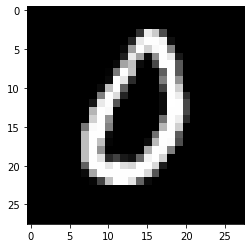

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


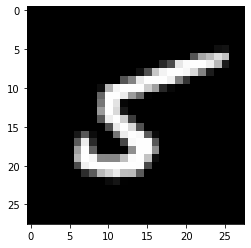

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


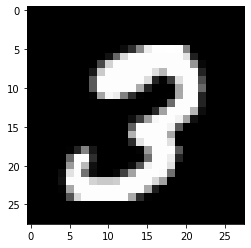

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Nicht funktionaler Code, dient dem Verständnis und der Kontrolle
plt.imshow(x_train[666], cmap="gray")
plt.show()
print(y_train[666])

plt.imshow(x_train[4711], cmap="gray")
plt.show()
print(y_train[4711])

plt.imshow(x_train[12345], cmap="gray")
plt.show()
print(y_train[12345])

####**Model konstruieren**

`Input`, `Flatten`, `Dense` und `Softmax` sind Schichttypen von künstlichen neuronalen Netzen.

Wir bauen das Netz Schicht für Schicht auf. Die einzelnen Schritte sind mit Kommentaren erklärt:


In [ ]:
from keras.layers import Input, Flatten, Dense, Softmax
from keras.models import Model

# Die Eingangsschicht: Entscheidend ist, das die Form
# identlisch ist mit jener der Bilder, die wir einspeisen
# wollen, also 28*28:
input_layer = Input(shape=(28,28))

# Die EIngangsschicht ist zweidimensional.
# Wir wollen aber mit eindimensional geformten Daten arbeiten.
# Diese Umformung erledigt eine Flatten-Schicht:

x = Flatten()(input_layer)

# Eine Dichte Schicht mit 500 Neuronen.
# "dicht" heißt: Jedes Neuron der vorherigen Schicht ist
# mit jedem Neuron dieser Schicht verbunden.
# Die Aktivierungsfunktion ist sigmoid:
x = Dense(units=500, activation='sigmoid')(x)

# Eine weitere dichte Schicht:
x = Dense(units=100, activation='sigmoid')(x)

# Die Ausgangschicht. Hier gilt wieder:
# Sie muss die selbe Form haben wie unsere Musterergebnisse,
# also in diesem Fall (10,).
# Die Aktivierungsfunktion ist softmax.
output_layer = Dense(units=NUM_CLASSES, activation = 'softmax')(x)

# Hier erzeugen wir das Netz:
# Wir müssen lediglich die Eingabeschicht und die Ausgabeschicht
# als Argumente an Model() übergeben.
model = Model(input_layer, output_layer)

Die Funktion `model.summary()` gibt eine tabellarische Darstellung des fertig konstruierten Netzes. Es ist wichtig, zu verstehen, warum eine bestimmte Schicht eine bestimmte Output Shape hat und warum wie viele Parameter (=Gewichte). Das werden wir im Seminar immer wieder ausgiebig diskutieren.

In [ ]:
# Nicht funktionaler Code, dient dem Verständnis und der Kontrolle
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


####**Optimierungsfunktion definieren und Modell kompilieren**

Die nächste Codezelle versieht unser Modell mit einem Optimierer, der für das Training des Neuronalen Netzes zuständig ist. `model.compile()` macht das Netz bereit zum Training. Die folgende Einstellung hat sich für Klassifizierungsprobleme bewährt.

Wir nehmen das erst einmal so hin!

In [ ]:
from keras.optimizers import Adam

opt = Adam(lr=0.0005)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

####**Training starten**

Die Funktion `model.fit()` startet das Training!

`x_train`: Die Trainings-Eingaben

`y_train`: Die Trainings-Ausgaben

`batch_size`: Die Beispiele werden beim Training nicht einzeln durch das Netz geschleust, sondern in Gruppen (=Batches). batch_size=32 bedeutet, dass immer 32 Beipsiele gleichzeitig durch das Netz geschleust werden.

`epochs`: In einer Epoche werden alle Beispiele einmal durch das Netz geschleust. Mit epochs=10 passiert das zehn Mal.

`shuffle`: sorgt dafür, dass die Beispiele vor jeder Epoche durchmischt werden wie ein Stapel Spielkarten.

`validation_data`: Übergabe der Test-Daten zur Überprüfung der Leistungsfähigkeit unseres Modells während des Trainings.


In [ ]:
model.fit(x_train, 
          y_train,
          batch_size=32,
          epochs=10,
          shuffle=True,
          validation_data = (x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4768 - accuracy: 0.8758 - val_loss: 0.2386 - val_accuracy: 0.9294
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2071 - accuracy: 0.9394 - val_loss: 0.1800 - val_accuracy: 0.9455
Epoch 3/10
 786/1875 [===========>..................] - ETA: 5s - loss: 0.1588 - accuracy: 0.9538

KeyboardInterrupt: ignored

Die Funktion `model.evaluate()` lässt (in diesem Fall) sämtliche Testdaten durch das trainierte Netz laufen und zeigt uns noch mal, das die Präzision auf den Testdaten 0.982, also 98.2 % beträgt.

#### **Das Modell bewerten**

In [ ]:
model.evaluate(x_test, y_test)

####**Das Modell in Aktion**



In [ ]:
CLASSES = np.arange(10)

indices = np.random.choice(range(10000), 5)
arrays = x_test[indices]

predictions = model.predict(arrays)

predictions = CLASSES[np.argmax(predictions, axis = 1)]

for idx, arr in enumerate(arrays):
  plt.imshow(arrays[idx], cmap="gray")
  plt.show()
  print(predictions[idx])